In [340]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as tr

In [342]:
transfor = tr.Compose([tr.Resize((224, 224))])

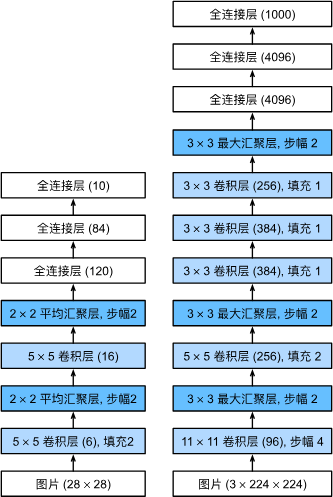

In [345]:
class AlexNet(nn.Module):
    """深度卷积神经网络"""
    def __init__(self):
        super().__init__()
        #卷积层：提取特征
        self.conv = nn.Sequential(nn.Conv2d(1, 96, kernel_size = 11, stride=4, padding=1),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=3, stride=2),
                                 
                                 nn.Conv2d(96, 256, kernel_size = 5, padding=2),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=3, stride=2),
                                 
                                 nn.Conv2d(256, 384, kernel_size=3, padding=1),
                                 nn.Conv2d(384, 384, kernel_size=3, padding=1),
                                 nn.Conv2d(384, 256, kernel_size=3, padding=1),
                                 nn.MaxPool2d(kernel_size=3, stride=2),
        #拉
                                 nn.Flatten())

        #全连接层
        self.fc = nn.Sequential(nn.Linear(5*5*256, 4096),
                                nn.ReLU(),
                                nn.Linear(4096, 4096),
                                nn.ReLU(),
                                nn.Linear(4096, 10))

    def forward(self, x):
        """前向传播"""
        vector1d = self.conv(x)
        return self.fc(vector1d)

In [347]:

mnist_train = torchvision.datasets.FashionMNIST(root="../torchvision_data", train=True, transform=tr.ToTensor(), download = True)
mnist_test = torchvision.datasets.FashionMNIST(root="../torchvision_data", train=False, transform=tr.ToTensor(), download = True)

In [374]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader((mnist_train), batch_size=256, shuffle=True)
test_dataloader = DataLoader((mnist_test), batch_size=256, shuffle=False)
len(test_dataloader)

40

In [352]:
device = torch.device("cuda")
model = AlexNet().to(device)

In [363]:
def train_model(model, train_dataloader, loss_func, optimizer):
    """ 模型训练函数 """
    model.train()
    total_loss = 0.
    for x, y in train_dataloader:
        x = transfor(x)
        y_hat = model(x.to(device))
        loss = loss_func(y_hat, y.to(device))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    return total_loss / len(train_dataloader)

def test_model(model, test_dataloader, loss_func):
    """ 模型测试函数 """
    model.eval()
    
    y_true = 0
    total_loss = 0.
    for x, y in train_dataloader:
        x = transfor(x)
        y_hat = model(x.to(device))
        loss = loss_func(y_hat, y.to(device))

        y_true += (y == torch.argmax(y_hat, dim=-1)).to(device).sum().item()
        
        total_loss += loss.item()

    print(f"acc: {round(y_true/len(test_dataloader.dataset).to(device))}")
    return total_loss / len(test_dataloader)

In [365]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [367]:
n_epoch = 50

train_loss_list = []
test_loss_list = []
for i in range(n_epoch):
    train_loss = train_model(model, train_dataloader, loss_func, optimizer)
    test_loss = test_model(model, train_dataloader, loss_func)
    
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    print(train_loss)
    #太慢了，手动停止

KeyboardInterrupt: 